# Covarianza

La covarianza es un valor que indica el grado de variación **lineal** conjunta de dos variables aleatorias respecto a sus medias.

Supongamos que queremos comparar dos variables aleatorias X e Y:
* Tendremos alta covarianza (positiva) cuando, para valores altos de X, tengamos mayoritariamente valores altos de Y
* Tendremos baja covarianza (negativa) cuando, para valores altos de X, tengamos mayoritariamente valores bajos de Y
* Tendremos covarianza cercana a 0, para valores altos de X, los valores de Y pueden ser altos o bajos por igual


Su formula es la siguiente:
\\[
cov(X,Y) = \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)\left( y_i-\bar{y} \right)
\\]

Recordemos la formula de la varianza:
\\[
Var(x) =  \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)^2
\\]

La covarianza de una variable aleatoria consigo misma es igual a la varianza:
\\[
cov(X,X) = Var(X)
\\]

En R la calculamos con la función *cov(x,y)*


[1] "La covarianza de las variables x,y1 es: 25"

[1] "La covarianza de las variables x,y2 es: -0.96"

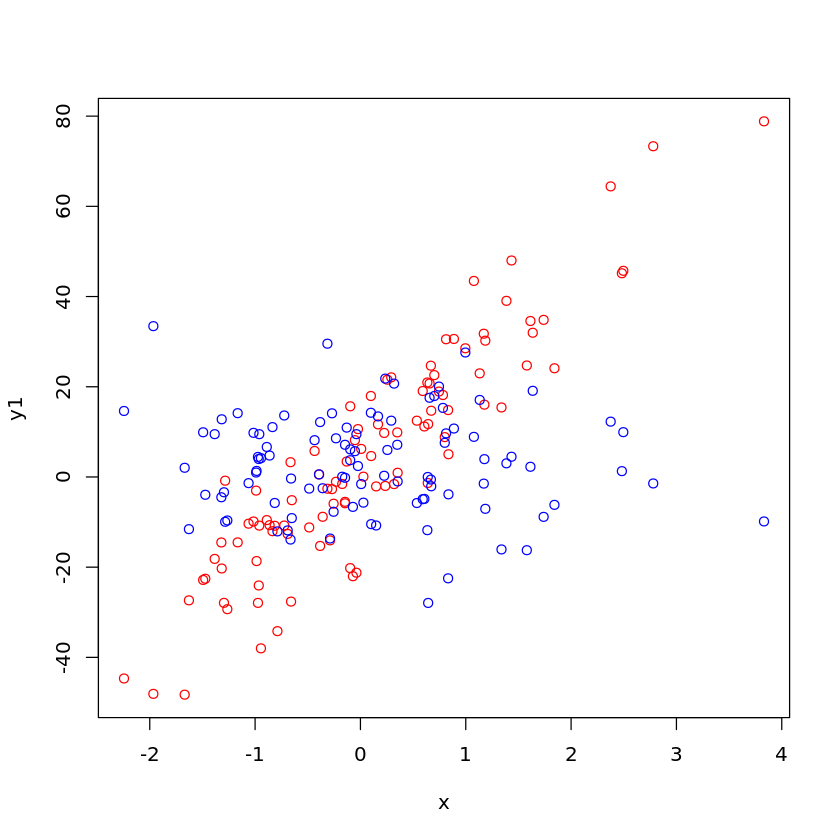

In [1]:
n<-100
x<-rnorm(n,sd=1)
y1<-20*x+1+rnorm(n,mean=1,sd=10)
y2<-rnorm(n,mean=2,sd=10)
cv1<-cov(x,y1)
cv2<-cov(x,y2)
paste("La covarianza de las variables x,y1 es:",round(cv1,2))
paste("La covarianza de las variables x,y2 es:",round(cv2,2))
plot(x,y1,col="red")
points(x,y2,col="blue")

[1] "La covarianza de las variables x,y es: 0.97"

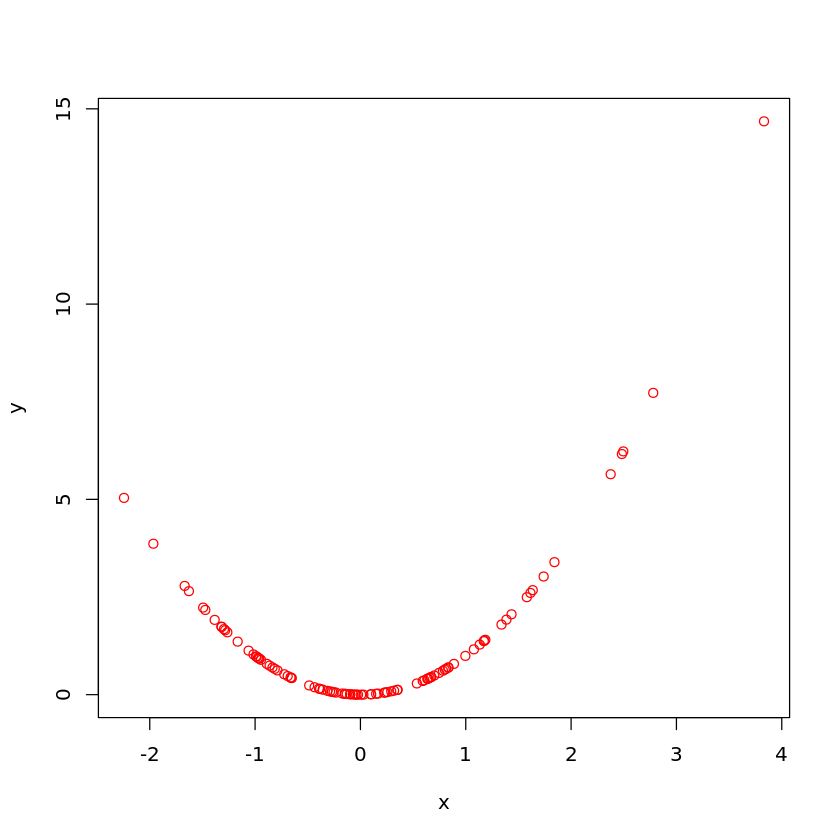

In [2]:
y<-x^2
cv<-cov(x,y)
paste("La covarianza de las variables x,y es:",round(cv,2))
plot(x,y,col="red")

## Matriz de covarianza

La matriz de covarianza muestra la varianza entre $n$ variables en forma de matriz $n \times n$, donde el valor de la celda ij es la covarianza de la secuencia i con la secuencia j, el valor de la diagonal es la varianza de la secuencia correspondiente.

In [3]:
cov(cbind(x,y1,y2))

,x,y1,y2
x,1.2325860,24.999630,-0.9620282
y1,24.9996301,604.141476,-3.9168156
y2,-0.9620282,-3.916816,122.7071181


# Correlación

La correlación es un valor que indica el grado de variación conjunta y **lineal** de dos variables aleatorias. Es la covarianza normalizada en el rango $[-1,1]$. Es una forma de ignorar la variación de cada una de las variables en si y centrarse únicamente en la relación que existe entre ambas, ya que una covarianza alta puede venir dada también porque una de las variables a estudiar tenga una varianza elevada.

Supongamos que queremos comparar dos variables aleatorias X e Y:
* Correlación cercana a 1, para valores altos de X, tengamos mayoritariamente valores altos de Y
* Correlación cercana a -1, para valores altos de X, tengamos mayoritariamente valores bajos de Y
* Correlación cercana a 0, para valores altos de X, los valores de Y pueden ser altos o bajos por igual


La función de correlación es:
\\[
\rho_{X,Y} = corr (X,Y) = \frac{cov(X,Y)}{\sigma_X \sigma_Y} 
\\]

En R la calculamos con la función *cor(x,y)*


In [4]:
cr1<-cor(x,y1)
cr2<-cor(x,y2)
paste("La covarianza de las variables x,y1 es:",round(cr1,2))
paste("La covarianza de las variables x,y2 es:",round(cr2,2))

cr<-cor(x,y)
paste("La covarianza de las variables x,y es:",round(cr,2))

[1] "La covarianza de las variables x,y1 es: 0.92"

[1] "La covarianza de las variables x,y2 es: -0.08"

[1] "La covarianza de las variables x,y es: 0.44"

## Correlación no implica causalidad

Que dos variables estén correladas no implica que una una es la causa de la otra, es decir, que haya una relación directa entre ambas.

Por ejemplo, existe una correlación de 0.992558 entre la tasa de divorcio en el estado de Maine y el consumo de margarina por habitante:
![](relaciones2variables/correlacion-margarina-divorcio.png)

Fallos comunes que pueden llevar a buscar una correlación alta:
* Utiliza solo la ventana de datos que te interesa.
* Compara muchas variables entre sí, por puro azar algunas evolucionarán a la par.

Más ejemplos en [tylervigen](http://www.tylervigen.com/spurious-correlations).



![Imagen no cargada. Edita y borra la @ ](https://imgs.xkcd.com/comics/correlation.png @ )

Dos variables también pueden estar correladas entre sí, pero la causalidad puede ser debida a una tercera variable oculta que no vemos.
Por ejemplo:

In [5]:
set.seed(2807)
x <- rnorm(100)
y <- 2*x+1+rnorm(100,0,0.1)
print(paste("La correlación entre x,y es:", cor(x,y)))

z <- 2*x+1+rnorm(100,0,0.1)
print(paste("La correlación entre x,z es:", cor(x,z)))

print(paste("Aunque no existe ninguna relación directa entre z,y existe una alta correlación:", cor(y,z)))

[1] "La correlación entre x,y es: 0.998826076751464"
[1] "La correlación entre x,z es: 0.998750973902264"
[1] "Aunque no existe ninguna relación directa entre z,y existe una alta correlación: 0.997110500303841"


### Ejemplo de Matriz de correlación: Mercado continuo

Si se decide invertir en acciones, una política conservadora consiste en diversificar lo máximo posible. Es decir, invertir en empresas que no tengan relaciones. De esta forma si un sector entra en crisis, las empresas de otro sector pueden no verse perjudicadas y salvaremos parte de nuestra inversión.

Un análisis muy sencillo puede ser mediante la matriz de correlación de diferentes empresas. Empresas que presentan un alto nivel de correlación presentan subidas y bajadas muy parecidas. De esta forma, una jugada inteligente podría ser tener un portfolio de acciones con baja correlación.

Veamos un ejemplo con unas pocas empresas y el cambio de moneda Bitcoin-Euro y el Nasdaq

In [6]:
suppressWarnings(require("quantmod"))
start <- as.Date("2000-01-01")
end <- as.Date("2018-01-01")
AAPL<-getSymbols("AAPL", src = "yahoo", from = start, to = end,auto.assign = F)
BTCEUR<-getSymbols("BTC-EUR", src = "yahoo", from = start, to = end,auto.assign = F)
IXIC<-getSymbols("^IXIC", src = "yahoo", from = start, to = end,auto.assign = F)
TEF<-getSymbols("TEF.MC", src = "yahoo", from = start, to = end,auto.assign = F)
VOD<-getSymbols("VOD", src = "yahoo", from = start, to = end,auto.assign = F)
SAN<-getSymbols("SAN.MC", src = "yahoo", from = start, to = end,auto.assign = F)
BBVA<-getSymbols("BBVA.MC", src = "yahoo", from = start, to = end,auto.assign = F)
TSLA<-getSymbols("TSLA", src = "yahoo", from = start, to = end,auto.assign = F)

Loading required package: quantmod
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Please see the Warning section of ‘?getSymbols.yahoo’ for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).
Warning message:
“TEF.MC contains missing values. Some functions will not work if objects contain

In [7]:
#candleChart(TSLA)

In [8]:
convertToDf<-function(stock){
    valueAdjusted<-stock[,6]
    df<-data.frame(index(valueAdjusted),valueAdjusted,row.names = 1:length(valueAdjusted))
    colnames(df)<-c("date",gsub(".Adjusted","",names(valueAdjusted)))
    df
}
df_IXIC<-convertToDf(IXIC)
df_AAPL<-convertToDf(AAPL)
df_TSLA<-convertToDf(TSLA)
df_TEF<-convertToDf(TEF)
df_VOD<-convertToDf(VOD)
df_SAN<-convertToDf(SAN)
df_BBVA<-convertToDf(BBVA)
df_BTCEUR<-convertToDf(BTCEUR)

head(df_IXIC)

date,IXIC
2000-01-03,4131.15
2000-01-04,3901.69
2000-01-05,3877.54
2000-01-06,3727.13
2000-01-07,3882.62
2000-01-10,4049.67


In [9]:
df_total<-merge(df_IXIC,df_AAPL,by="date",all = T)
head(df_total)

date,IXIC,AAPL
2000-01-03,4131.15,2.706315
2000-01-04,3901.69,2.478144
2000-01-05,3877.54,2.514410
2000-01-06,3727.13,2.296816
2000-01-07,3882.62,2.405613
2000-01-10,4049.67,2.363304


In [10]:
df_total<-merge(df_total,df_TSLA,by="date",all = T)
df_total<-merge(df_total,df_TEF,by="date",all = T)
df_total<-merge(df_total,df_VOD,by="date",all = T)
df_total<-merge(df_total,df_SAN,by="date",all = T)
df_total<-merge(df_total,df_BBVA,by="date",all = T)
df_total<-merge(df_total,df_BTCEUR,by="date",all = T)


tail(df_total)


,date,IXIC,AAPL,TSLA,TEF.MC,VOD,SAN.MC,BBVA.MC,BTC-EUR
5341,2017-12-28,6950.16,170.3853,315.36,8.195,31.93,5.402438,7.147,12264.02
5342,2017-12-29,6903.39,168.5428,311.35,8.125,31.90,5.371068,7.112,12247.68
5343,2017-12-30,NA,NA,NA,NA,NA,NA,NA,10654.40
5344,2017-12-31,NA,NA,NA,NA,NA,NA,NA,11850.31
5345,2018-01-01,NA,NA,NA,NA,NA,NA,NA,11391.39
5346,2018-01-02,NA,NA,NA,8.125,NA,5.371068,7.112,NA


In [11]:
cor(df_total[2:ncol(df_total)],use="complete.obs")

,IXIC,AAPL,TSLA,TEF.MC,VOD,SAN.MC,BBVA.MC,BTC-EUR
IXIC,1.0000000,0.9660474,0.9384264,0.39895452,0.6665654,0.6083339,0.6500005,0.59829585
AAPL,0.9660474,1.0000000,0.8886094,0.45111488,0.5947484,0.6171558,0.6164718,0.60393189
TSLA,0.9384264,0.8886094,1.0000000,0.47806124,0.7728288,0.7062226,0.7593886,0.48418515
TEF.MC,0.3989545,0.4511149,0.4780612,1.00000000,0.5025540,0.6759211,0.6732159,0.03141217
VOD,0.6665654,0.5947484,0.7728288,0.50255401,1.0000000,0.6179607,0.7537718,0.27178729
SAN.MC,0.6083339,0.6171558,0.7062226,0.67592113,0.6179607,1.0000000,0.9429396,0.33083256
BBVA.MC,0.6500005,0.6164718,0.7593886,0.67321588,0.7537718,0.9429396,1.0000000,0.29286151
BTC-EUR,0.5982958,0.6039319,0.4841851,0.03141217,0.2717873,0.3308326,0.2928615,1.00000000


Podemos ver como Apple y Tesla están bastante correlados con el Nasdaq, como cabría esperar, al ser este un índice de empresas tecnológicas en USA.

Curiosamente Telefónica y Vodafone se encuentran muy poco correlados, pese a pertenecer al mismo sector. Puede ser porque su área de influencia es diferente. Vodafone está más correlado con el Nasdaq que Telefónica, algo que tiene sentido ya que Vodafone opera en USA.

Se ve como la correlación entre el banco Santander y el BBVA es altísima, esto implica que ambas empresas tienen un comportamiento muy parecido. Según esto daría igual comprar acciones del Santander o del BBVA, las ganancias serían las mismas aproximadamente.

Como cabría esperar el cambio Bitcoin-Euro se encuentra poco correlado con el resto de empresas. Hay una correlación con Apple, pero seguramente se deba más a una casualidad, las acciones de Apple han subido mucho desde que sacó el iPhone, el Bitcoin también ha tenido un crecimiento muy alto en los últimos años.

# Regresión lineal


Modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, la variables independiente $X$ y un término aleatorio $\varepsilon$. Este modelo puede ser expresado como:

\\[
y_i=\beta_0+\beta_1 x_i+\varepsilon_i  \quad \text{para }i=1,\dots,n
\\]

Esto significa que se puede expandir de la forma:
\\[
\begin{split}
y_1 &=\beta_0+\beta_1 x_1+\varepsilon_1  \\
y_2 &=\beta_0+\beta_1 x_2+\varepsilon_2  \\
\vdots& \\
y_n&=\beta_0+\beta_1 x_n+\varepsilon_n 
\end{split}
\\]


donde:
* $y_i$: i-esimo valor de la variable dependiente
* $x_i$: i-esimo valor de la variable independiente
* $\beta_0, \beta_1$: parámetros a determinal que dado un conjunto de $x_i$ produce los mejores $y_i$
 * $\beta_0$ : Puede ser llamado sesgo, bias, intercept o término constante. Indica el corte en el eje Y
 * $\beta_1$ : Puede ser llamado pendiente, slope. Indica cuanto aumenta Y por cada incremento de X
* $\varepsilon_i$: error, valor aleatorio.

Podemos escribirlo en forma de matriz:
\\[
\begin{bmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots \\ 
 y_n 
\end{bmatrix}
=
\begin{bmatrix}
 1 & x_1\\ 
 1 & x_2 \\ 
 \vdots & \vdots \\ 
 1 & x_n 
\end{bmatrix}
\begin{bmatrix}
\beta_0
\\ 
\beta_1
\end{bmatrix}+
\begin{bmatrix}
 \varepsilon_1 \\ 
 \varepsilon_2 \\ 
 \vdots \\ 
 \varepsilon_n
\end{bmatrix}
\\]
Lo que se puede simplificar como:
\\[
Y=X \beta+\varepsilon
\\]




Donde:
* $Y \in \mathbb{R}^{n \times 1}$ 
* $X \in \mathbb{R}^{n \times 2}$ 
* $\beta \in \mathbb{R}^{1 \times 2}$ 
* $\varepsilon \in \mathbb{R}^{n \times 1}$ 




In [13]:
n<-10
beta<-matrix(c(5,2),nrow = 2)
X<-matrix(c(rep(1,n),1:n),ncol = 2, byrow = F)

print("El valor de la matriz X es:")
X
print("El valor de la Beta es:")
beta

[1] "El valor de la matriz X es:"


1,1
1,2
1,3
1,4
1,5
1,6
1,7
1,8
1,9
1,10


[1] "El valor de la Beta es:"


5
2


In [14]:
print("El valor de la matriz X·Beta es:")
X %*% beta

[1] "El valor de la matriz X·Beta es:"


7
9
11
13
15
17
19
21
23
25


In [15]:
print("El valor final de la matriz Y es:")
e<-rnorm(n)
Y<-X %*% beta +e
Y

[1] "El valor final de la matriz Y es:"


6.984555
9.056068
10.687285
10.802624
14.124323
16.552767
20.927620
21.372202
24.401164
25.677399


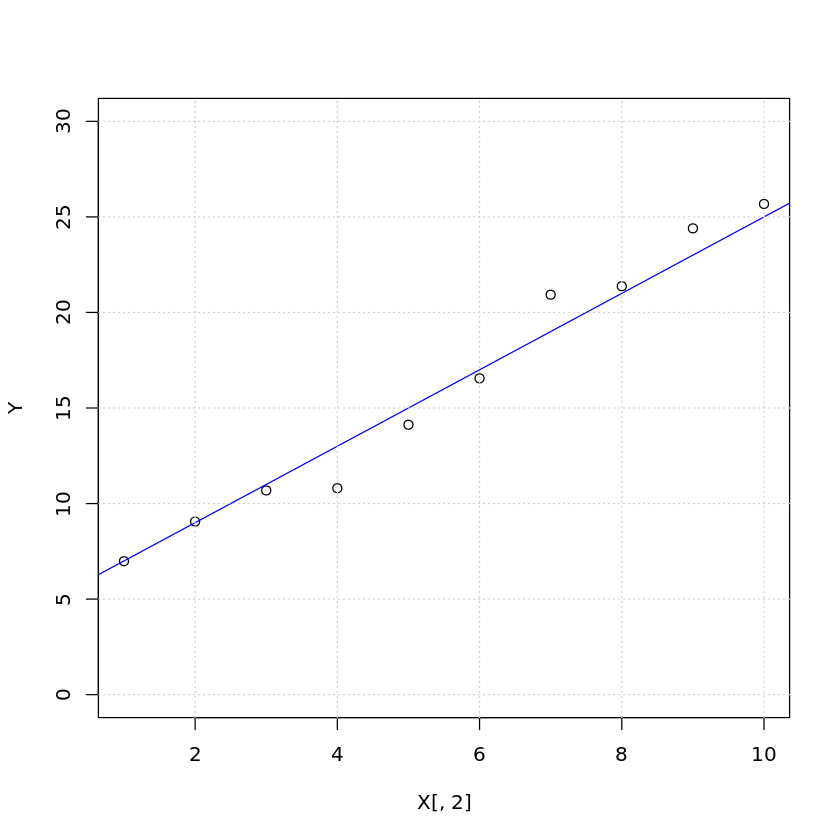

In [16]:
plot(X[,2],Y,ylim = c(0,30))
abline(beta,col="blue")
grid()

## ¿Cómo calculamos $\beta$?

### Definición de inversa de una matriz

La inversa de una matriz una matriz cuadrada $A$ se escribe $A^-1$ y se define como:
\\[
A^{-1} \cdot A=I=A \cdot A^{-1}
\\]

Donde I es la matriz identidad:
\\[
\begin{bmatrix}
1 & 0 & \dots & 0\\ 
0 & 1 & \dots & 0 \\ 
\vdots &  & \ddots &  \vdots \\ 
0 & 0  & \dots & 1
\end{bmatrix}
\\]



In [17]:
A<-matrix(c(1,3,5,2,3,4,1,7,8),nrow=3)
print("Tenemos una matriz A:")
A

[1] "Tenemos una matriz A:"


1,2,1
3,3,7
5,4,8


In [18]:
print("La inversa de A es:")
iA<-solve(A)
iA

[1] "La inversa de A es:"


-0.2666667,-0.8,0.7333333
0.7333333,0.2,-0.2666667
-0.2000000,0.4,-0.2000000


In [19]:
print("Si multiplicamos una matriz por su inversa obtenemso una matriz identidad")
iA %*% A

[1] "Si multiplicamos una matriz por su inversa obtenemso una matriz identidad"


1.000000e+00,-4.440892e-16,0.000000e+00
-2.220446e-16,1.000000e+00,-4.440892e-16
-2.220446e-16,0.000000e+00,1.000000e+00


Podemos usar la matriz inversa para resolver ecuaciones:
\\[
\begin{split}
u&=Av \\
A^{-1}u&=A^{-1}Av \\
A^{-1}u&=Iv \\
A^{-1}u&=v \\
\end{split}
\\]



In [20]:
print("Calculamos el vector u como resultado de multiplicar A·v")
v<-c(1,2,3)
u<-A %*% v
u

[1] "Calculamos el vector u como resultado de multiplicar A·v"


8
30
37


In [21]:
print("Comprobamos que multiplicando u por la inversa de A obtenemos v de vuelta:")
iA %*% u

[1] "Comprobamos que multiplicando u por la inversa de A obtenemos v de vuelta:"


1
2
3


### Pseudoinversa Moore-Penrose

¿Qué ocurre si la matriz que queremos invertir no es cuadrada? Entonces el sistema de ecuaciones no tiene una única solución o simplemente no tiene solución.

Lo que tratamos de encontrar es la menos mala de las soluciones.

Para números reales se define como:
\\[
X^+ = \left( X^{\intercal} X  \right)^{-1} X^{\intercal}
\\]
Cuando:
\\[
X^+X = I
\\]



El problema original consistía en querer calcular $\beta$ de tal forma que se minimice la influencia de $\varepsilon$:
\\[
Y=X \beta+\varepsilon
\\]
En nuestro sistema $\varepsilon$ es desconocido, pero sabemos que tiene media cero y varianza finita. Así que  simplificamos el siguiente sistema de ecuaciones:

\\[
\begin{split}
Y=&X \beta' \\
X^+Y=& X^+X \beta' \\
X^+Y=& \beta' \\
X^+Y=& \beta' \\
\left( X^{\intercal}X  \right)^{-1} X^{\intercal} Y =& \beta'
\end{split}
\\]

Ahora tenemos, a partir de $X$ e $Y$ una estimación $\beta'$. Podemos entonces, a partir de valores conocidos de $X$ calcular una estimación de $Y'$. 
\\[
Y'=X \beta'
\\]

Evidentemente $Y \neq Y'$, llamaremos **residuo**(error) a la diferencia entre el valor real y el valor estimado : $Y-Y'$. 

El método anterior garantiza que el error cuadrático medio sea mínimo.
\\[
{1 \over n} \sum_{i=0}^n{(Y-Y')^2}
\\]

In [22]:
print("El valor estimado de beta es")
est_beta<-solve(t(X) %*% X) %*% t(X) %*% Y
est_beta

[1] "El valor estimado de beta es"


3.995958
2.193208


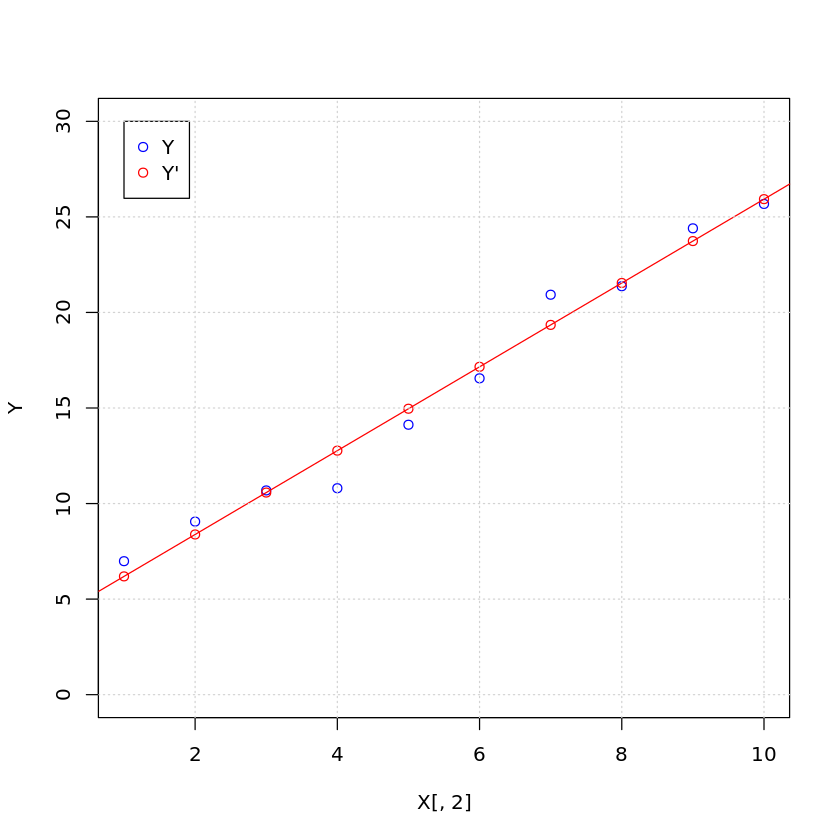

In [23]:
est_Y<-X %*% est_beta
plot(X[,2],Y,ylim = c(0,30),col="blue")
points(X[,2],est_Y,col="red")
abline(est_beta,col="red")

legend(1,30,legend=c("Y","Y'"),col=c("blue","red"),pch=1)
grid()

In [24]:
print(paste("El error cuadrático medio es:",mean((Y-est_Y)^2)))

[1] "El error cuadrático medio es: 0.905884084817082"


### Método en R

En R existe la función lm (linear model) que se utiliza para calcular la dependencia entre variables

In [25]:
modelo<-data.frame(Y=Y,X=X[,2])
head(modelo)
model<-lm(data=modelo, formula = Y ~ X)

est_beta2<-model$coefficients

print(paste("Los coeficientes estimados son: ",paste(est_beta2,collapse=",")))

summary(model)

Y,X
6.984555,1
9.056068,2
10.687285,3
10.802624,4
14.124323,5
16.552767,6


[1] "Los coeficientes estimados son:  3.99595767769129,2.1932078047503"



Call:
lm(formula = Y ~ X, data = modelo)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.96616 -0.51449 -0.02886  0.67185  1.57921 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.9960     0.7269   5.497 0.000576 ***
X             2.1932     0.1172  18.720 6.85e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.064 on 8 degrees of freedom
Multiple R-squared:  0.9777,	Adjusted R-squared:  0.9749 
F-statistic: 350.5 on 1 and 8 DF,  p-value: 6.845e-08


## Coeficiente de determinación $R^2$


Proporciona una medida de como de bien nuestra medida sigue al modelo. Se calcula mediante:
\\[
R^2=1-\frac{SS_{res}}{SS_t}
\\]

Donde $SS_{res}$ es la suma del cuadrado de los residuos:
\\[
SS_{res}=\sum_i (y_i-y_i')^2
\\]

y $SS_{tot}$ es proporcional a la varianza de $Y$:

\\[
SS_{tot}=\sum_i (y_i-\bar{y})^2
\\]

Cuanto más cercano a $1$ mejor seguirá la predicción a los datos reales.

In [26]:
Rsq<-1-sum((est_Y-Y)^2)/sum((Y-mean(Y))^2)
print(paste("El coeficiente de determinación es:",Rsq))

[1] "El coeficiente de determinación es: 0.977681926542289"


Nuevo ejemplo:

[1] "El coeficiente de determinación es: 0.000319680391957943"


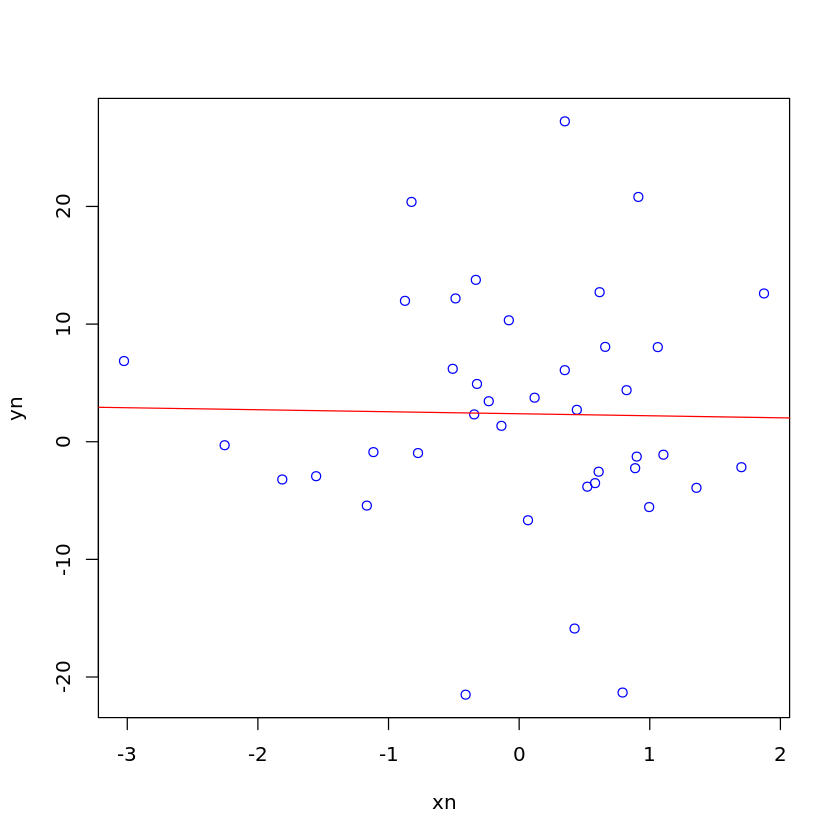

In [27]:
n<-40
xn<-rnorm(n,sd=1)
yn<-xn*2+rnorm(n,mean=2,sd=10)
model<-lm(formula = yn ~ xn)


plot(xn,yn,col="blue")
abline(model$coefficients,col="red")
print(paste("El coeficiente de determinación es:",summary(model)$r.squared ))



![Imagen no cargada. Edita y borra la @ ](https://imgs.xkcd.com/comics/linear_regression.png @)

# Regresión lineal múltiple

Modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, las variables independientes $X_i$ y un término aleatorio $\varepsilon$. Este modelo puede ser expresado como:

\\[
Y=\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p+\varepsilon = \sum \beta_k X_k+\varepsilon
\\]


donde:
* $Y$: variable dependiente
* $X_1,X_2,\cdots ,X_p$: variables independientes
* $\beta_0, \beta_1,\beta_2,\cdots ,\beta_p$: parámetros a determinal que dado un $X_k$ produce el mejor posible $Y$
* $\varepsilon$: error, valor aleatorio.

Condiciones para aplicarlo:
1. Que la relación entre las variables sea lineal.
2. Que los errores en la medición de $X_k$ sean independientes entre sí.
3. Que los errores tengan varianza constante.
4. Que los errores tengan una media aritmética igual a cero.


Para calcular el valor óptimo de $\beta$ vamos a utilizar un poco de álgebra linea. 
\\[
\begin{split}
y_1 &=\beta_1 x_{11}+\beta_2 x_{12}+\beta_3 x_{13}+\cdots+\beta_p x_{1p}+\varepsilon_1  \\
y_2 &=\beta_1 x_{21}+\beta_2 x_{22}+\beta_3 x_{23}+\cdots+\beta_p x_{2p}+\varepsilon_1  \\
\vdots& \\
y_n &=\beta_1 x_{n1}+\beta_2 x_{n2}+\beta_3 x_{n3}+\cdots+\beta_p x_{np}+\varepsilon_1  \\
\end{split}
\\]

Podemos escribirlo en forma de matriz:
\\[
\begin{bmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots \\ 
 y_n 
\end{bmatrix}
=
\begin{bmatrix}
 x_{11} & x_{12} & x_{13} & \cdots & x_{1p} \\ 
 x_{21} & x_{22} & x_{23} & \cdots & x_{2p} \\ 
 \vdots & & & \ddots & \vdots \\ 
 x_{n1} & x_{n2} & x_{n3} & \cdots & x_{np}
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\ 
\beta_2 \\
\beta_3 \\
\vdots  \\
\beta_p
\end{bmatrix}+
\begin{bmatrix}
 \varepsilon_1 \\ 
 \varepsilon_2 \\ 
 \vdots \\ 
 \varepsilon_n
\end{bmatrix}
\\]
Lo que se puede simplificar como:
\\[
Y=X \beta+\varepsilon
\\]

Al igual que en el caso anterior podemos estimar $\beta$ con:
\\[
\beta=\left( X^{\intercal}X  \right)^{-1} X^{\intercal} Y
\\]

In [28]:
n<-10
x1<-rep(1,n)
x2<-seq(2,to=11,length.out = n)
x3<-seq(0.3,to=5,length.out = n)^2
X<-matrix(c(x1,x2,x3),nrow=n,byrow = F)
print("El valor de la matriz X es:")
X
beta<-matrix(c(5,2,14),nrow=3)
print("El valor de la matriz Y es:")
Y<-X %*% beta+rnorm(n)
Y

[1] "El valor de la matriz X es:"


1,2,0.0900000
1,3,0.6760494
1,4,1.8075309
1,5,3.4844444
1,6,5.7067901
1,7,8.4745679
1,8,11.7877778
1,9,15.6464198
1,10,20.0504938
1,11,25.0000000


[1] "El valor de la matriz Y es:"


12.44631
21.02046
39.26896
63.41107
95.77805
138.59478
185.62823
242.68273
305.86280
377.61463


In [29]:
print("El valor estimado de beta es:")
est_beta<-solve(t(X) %*% X) %*% t(X) %*% Y
est_beta

print("El valor real de beta es:")
beta

[1] "El valor estimado de beta es:"


8.446665
1.145314
14.272410


[1] "El valor real de beta es:"


5
2
14


Esto también se puede resolver con la función *lm* de R. Ignoramos el vector *x1* porque la función por defecto ya añade el término.

In [30]:
lm(Y~x2+x3)


Call:
lm(formula = Y ~ x2 + x3)

Coefficients:
(Intercept)           x2           x3  
      8.447        1.145       14.272  


### Estimación de funciones polinómicas

Podemos estimar funciones polinómicas del tipo:
\\[
y_i=\beta_0+\beta_1·x_i·+\beta_2·x_i^2+\beta_3·x_i^3+\cdots+\beta_p·x_i^p
\\]


Simplemente reescribiendolo como un modelo lineal múltple
\\[
\begin{bmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots \\ 
 y_n 
\end{bmatrix}
=
\begin{bmatrix}
 1 & x_{1} & x_{1}^2 & x_{1}^3 & \cdots & x_{1}^p \\ 
 1 & x_{2} & x_{2}^2 & x_{2}^3 & \cdots & x_{2}^p \\ 
 \vdots & & & \ddots & \vdots \\ 
 1 & x_{n} & x_{n}^2 & x_{n}^3 & \cdots & x_{n}^p
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\ 
\beta_1 \\
\beta_2 \\
\beta_3 \\
\vdots  \\
\beta_p
\end{bmatrix}+
\begin{bmatrix}
 \varepsilon_1 \\ 
 \varepsilon_2 \\ 
 \vdots \\ 
 \varepsilon_n
\end{bmatrix}
\\]
Lo que se puede simplificar como:
\\[
Y=X \beta+\varepsilon
\\]


[1] "El valor estimado de beta es:"


-5.1533708
2.4397485
3.0531273
0.4872863


[1] "El valor real de beta es:"


1.0
1.0
3.0
0.5


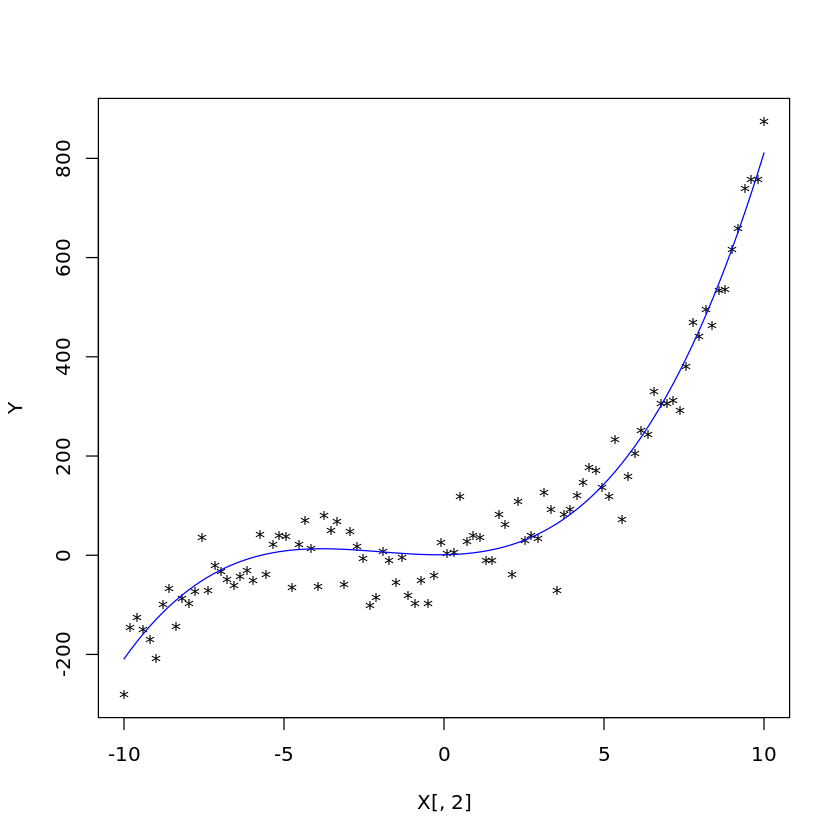

In [31]:
n<-100
x<-seq(-10,10,length.out = n)

x0<-rep(1,n)
x1<-x
x2<-x^2 
x3<-x^3
X<-matrix(c(x0,x1,x2,x3),nrow=n,byrow = F)

beta<-matrix(c(1,1,3,0.5),nrow=4)
Y<-X %*% beta+rnorm(n,sd = 50)

plot(X[,2],Y,pch='*')

est_beta<-solve(t(X) %*% X) %*% t(X) %*% Y
est_Y<-X %*% beta
lines(X[,2],est_Y,col="blue")

print("El valor estimado de beta es:")
est_beta

print("El valor real de beta es:")
beta

In [32]:
lm(Y~x+I(x^2)+I(x^3))


Call:
lm(formula = Y ~ x + I(x^2) + I(x^3))

Coefficients:
(Intercept)            x       I(x^2)       I(x^3)  
    -5.1534       2.4397       3.0531       0.4873  


### Sobreajuste

El sobreajuste o overfitting ocurre en los modelos que tienen un grado polinómico tan alto que empiezan a seguir al ruido, se sobreajustan demasiado a los datos, perdiendo una visión más general de los datos y proporcionando predicciones peores.


Call:
lm(formula = Y ~ poly(x, 24))

Coefficients:
  (Intercept)   poly(x, 24)1   poly(x, 24)2   poly(x, 24)3   poly(x, 24)4  
       98.674       1881.461        928.517        758.727         20.725  
 poly(x, 24)5   poly(x, 24)6   poly(x, 24)7   poly(x, 24)8   poly(x, 24)9  
      104.244         68.365        -41.539        -41.947         87.206  
poly(x, 24)10  poly(x, 24)11  poly(x, 24)12  poly(x, 24)13  poly(x, 24)14  
       -2.788        -56.843        -16.664        112.136        -94.877  
poly(x, 24)15  poly(x, 24)16  poly(x, 24)17  poly(x, 24)18  poly(x, 24)19  
        4.774          9.176         91.352          8.431         -6.111  
poly(x, 24)20  poly(x, 24)21  poly(x, 24)22  poly(x, 24)23  poly(x, 24)24  
       18.326         54.267         16.368         39.749         36.052  


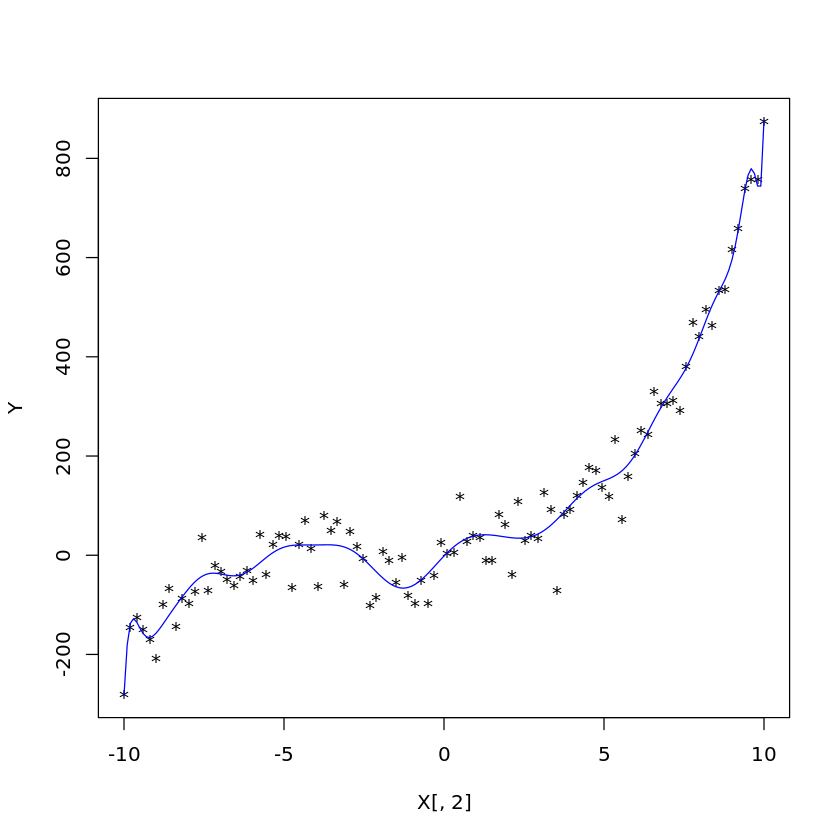

In [33]:
modelOverfit<-lm(Y~poly(x,24))
modelOverfit
plot(X[,2],Y,pch='*')

xp<-seq(-10,10,by=0.1)
yp<-predict(modelOverfit,data.frame(x=xp))
lines(xp,yp,col="blue")


### Ejemplo: Evolución de la población en españa

Volvamos a la distribución por edad de la población española a mediados de 2017. Podemos ver como el número de personas de más de 41 años parece ser representado más o menos por una línea:

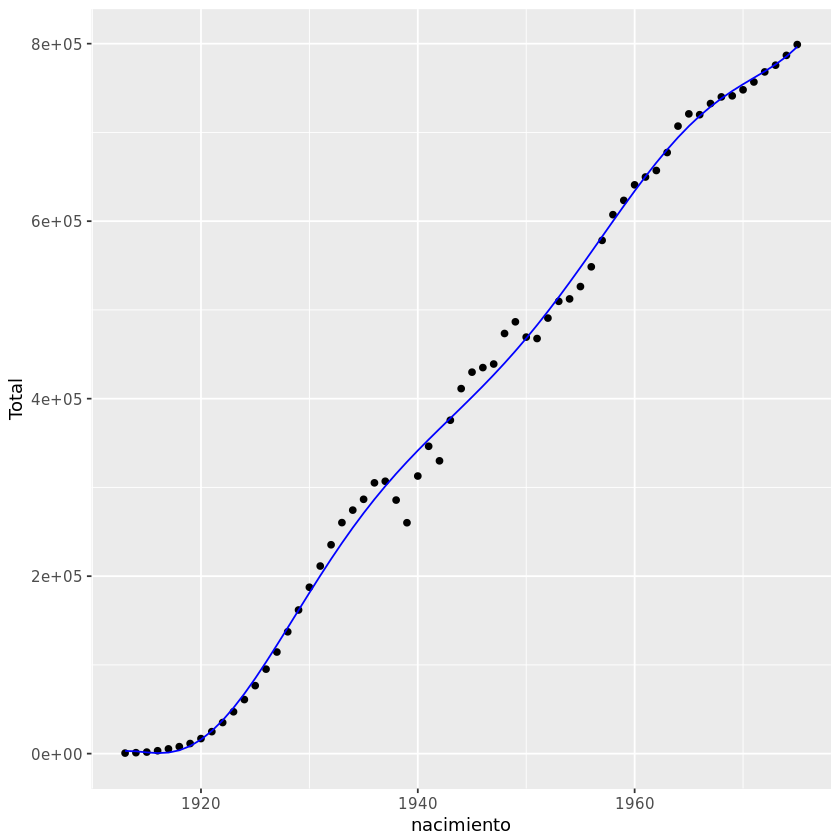

In [34]:
library(ggplot2)
poblacion<-read.csv("relaciones2variables/9663c.csv",skip=6,
                    fileEncoding="ISO-8859-1",header=F,col.names=c("edadTxt","Total","Hombres","Mujeres",""))
poblacion<-poblacion[1:105,c("edadTxt","Total")]
poblacion$edad<-0:104
poblacion$nacimiento<-2017-0:104
poblacion<-subset(poblacion,edad>41)

model<-lm(data=poblacion,Total~poly(edad,8))

poblacion$predicted<-predict(model,poblacion)

ggplot(data=poblacion,aes(x=nacimiento))+geom_point(aes(y=Total))+geom_line(aes(y=predicted),color="blue")

Pero si nos fijamos con detenimiento en el residuo, la diferencia entre el valor real y el esperado, podemos ver como todavía hoy se puede ver que los primero años de la postguerra hubo menos nacimientos.

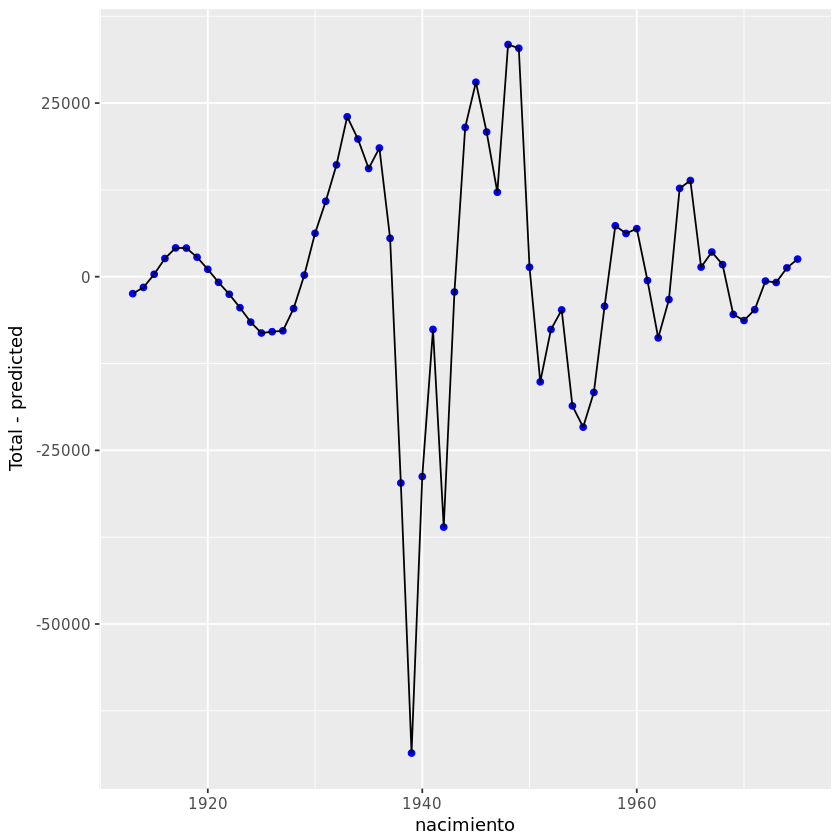

In [35]:
ggplot(data=poblacion,aes(x=nacimiento))+geom_point(aes(y=Total-predicted),color="blue")+
    geom_line(aes(y=Total-predicted))

### Ejemplo: Evolución de la producción de cereales por hectárea en Italia

El siguiente gráfico muestra como ha evolucionado la producción de cereales por hectarea cultivada en italia desde 1960 hasta la actualidad.

Alrededor del mundo se observa una tendencia muy parecida a partir de los años 60, nuevas especies híbridas de cereales junto con nuevos fertilizantes químicos y pesticidas, aumentarion la producción agrícola en todo el mundo en lo que se acabó llamando la revolución verde. El padre de este movimiento es considerado Normal Borlaug, premio nobel de la paz en 1970.
![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Norman_Borlaug.jpg/220px-Norman_Borlaug.jpg)





Call:
lm(formula = yieldCereal ~ DATE, data = yieldKgIt)

Residuals:
    Min      1Q  Median      3Q     Max 
-723.70 -114.47  -14.89  136.04  495.01 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.302e+05  3.910e+03  -33.29   <2e-16 ***
DATE         6.750e+01  1.967e+00   34.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 225.3 on 52 degrees of freedom
Multiple R-squared:  0.9577,	Adjusted R-squared:  0.9569 
F-statistic:  1177 on 1 and 52 DF,  p-value: < 2.2e-16


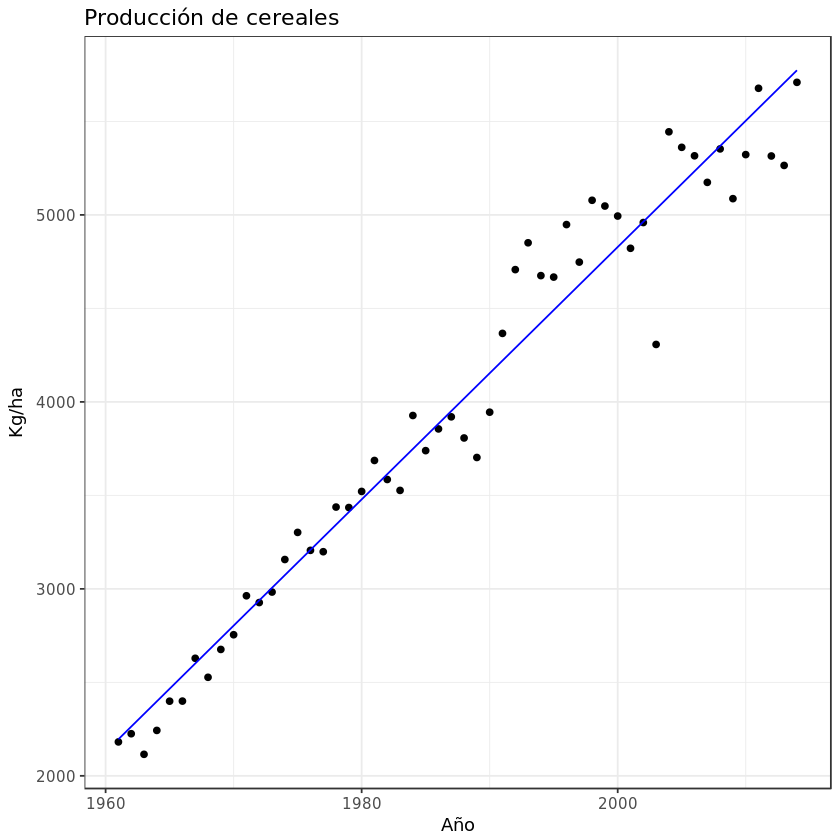

In [36]:
library(ggplot2)
yieldKgIt<-read.csv("relaciones2variables/yieldKgIt.csv")
yieldKgIt<-na.omit(yieldKgIt)

model<-lm(data=yieldKgIt,yieldCereal~DATE)
summary(model)
yieldKgIt$predicted<-predict(model,yieldKgIt)

ggplot(data=yieldKgIt,aes(x=DATE))+
    geom_point(aes(y=yieldCereal))+
    geom_line(aes(y=predicted),color="blue")+
    theme_bw()+xlab("Año")+ylab("Kg/ha")+ggtitle("Producción de cereales")

Cada año, de media, la producción de cereales aumenta en 67.5kg/ha, sigue una curva lineal con bastante poco error. En la siguiente gráfica se ve los residuos:

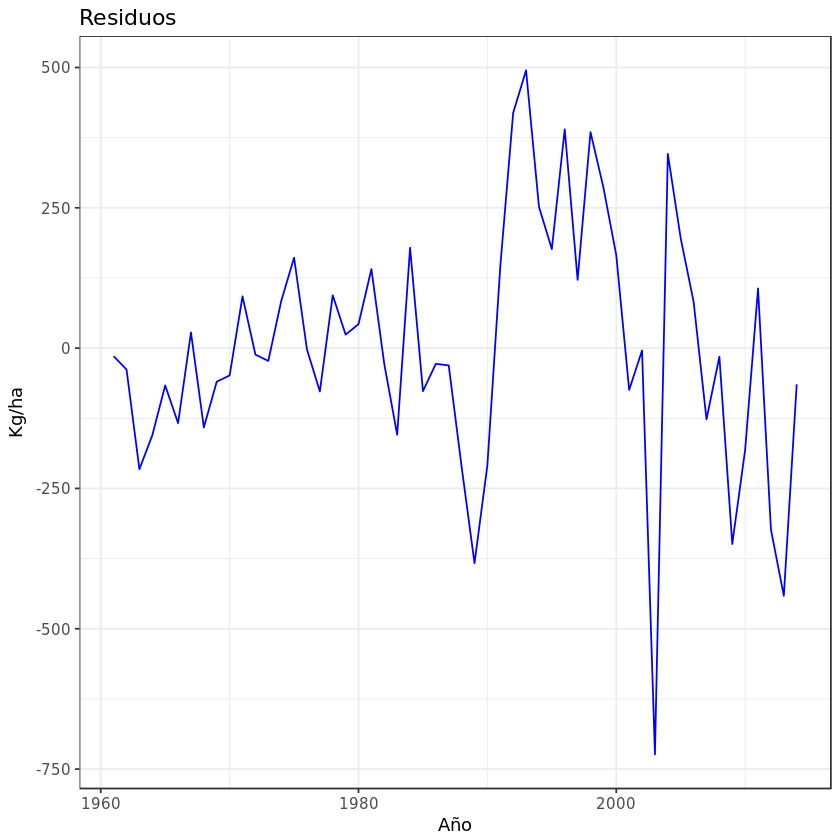

In [37]:

ggplot(data=yieldKgIt,aes(x=DATE))+    
    geom_line(aes(y=yieldCereal-predicted),color="blue")+
    theme_bw()+xlab("Año")+ylab("Kg/ha")+ggtitle("Residuos")

#plot(yieldKgIt$DATE,model$residuals,t="l")


¿Porqué a veces la producción de cereales es inferior o superior con la curva esperada?
¿Podría haber factores meteorológicos involucrados?

No tenemos el histórico de meteorología de toda italia, pero podemos aproximarlo con el histórico de la ciudad de Bolonia.


In [38]:
residuals<-data.frame(DATE=yieldKgIt$DATE,res=model$residuals)
weather<-read.csv("relaciones2variables/ITE00100550.csv")
wc<-merge(weather[,c("DATE","PRCP")],residuals,by="DATE")
cor(wc$PRCP,wc$res,use="complete.obs")

[1] 0.1847833

# Teoría de la información


Desarrollada por Claude Shannon en 1941 para cuantificar la cantidad de información que puede viajar por un canal de comunicaciones.

En los orígenes de las comunicaciones telefónicas cada conversación iba por un cable, lo que originaba que las ciudades estuvieran llevas de cables. La siguiente forto obtenida de [THW](http://ethw.org/File:Phoneline1903.jpg) muesta la construcción de un poste telefónico en 1903.

![Imagen no cargada. Edita y borra la ]( http://ethw.org/w/images/thumb/5/5d/Phoneline1903.jpg/433px-Phoneline1903.jpg )

Más adelante se aprendió a transmitir varios canales en un mismo cable, separándo cada conversación telefónica en un canal lógico a una particual frecuencia. Pero luego apareció la duda, ¿cual era la capacidad máxima del canal suponiendo que nuestra tecnología fuera perfecta? ¿cual es su límite teórico?. Aquí es donde entra la teoría de la información.

También se utiliza para saber cual es el límite máximo al cual podemos comprimir un fichero o la mejor forma de codificar una señal antes de transmitirla.

## Entropía

Es un concepto prestado de termodinámica. Se utiliza para medir la cantidad de información que tiene una señal (o secuencia), es decir, mide su impredictivilidad, su desorden.

Su formula es:
\\[
H(X)=-\sum_{i=1}^n{P(_i)log_bP(x_i)}
\\]
Donde $b$ es la base del logaritmo a usar, los valores más comunes son:
* base 2 : La medida sería en bits
* base e : Sería un logaritmo neperiano, la medida sería en nats
* base 10: Poco utilizado, la medida sería en bans.

### Ejemplo 

¿Cuantos bits se necesitan para decir si al tirar una moneda ha salido cara o cruz? Suponiendo que la moneda no está trucada.
Si la moneda no está trucada sabemos que:
\\[
P(cara)=P(cruz)=0.5
\\]
Entonces aplicando la formula anterior:
\\[
\begin{split}
H(X)&=-P(cara)log_2P(cara)-P(cruz)log_2P(cruz)\\
H(X)&=-2·0.5·log_2P(0.5) \\
H(X)&=-2·0.5·(-1) \\
H(X)&=1
\end{split}
\\]
Para representar 2 sucesos equiprobables hace falta como mínimo 1 bit.

Pero, ¿qué ocurre si los dos sucesos no son equiprobables?. Es decir, si:
\\[
\begin{split}
P(0)&=q=1-p \\
P(1)&=p
\end{split}
\\]

Warning message:
“Removed 2 rows containing missing values (geom_path).”

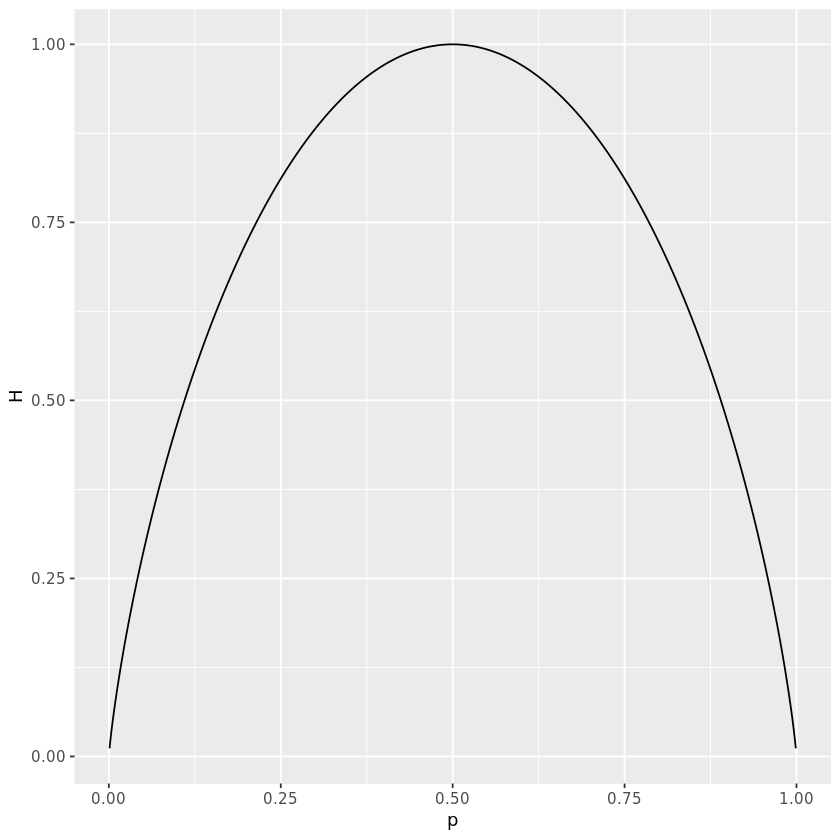

In [39]:
require(ggplot2)
ent<-data.frame(H=NA,p=seq(0,1,by=0.001))
for (i in 1:nrow(ent)){
    p<-ent$p[i]
    q<-1-p
    ent$H[i]<- -(q*log2(q)+p*log2(p))
}
ggplot(data=ent,aes(x=p,y=H))+geom_line()

![Imagen no cargada. Edita y borra la @ ](https://i1.wp.com/www.geeksaresexy.net/wp-content/uploads/2014/02/entropy.jpg @ )

Cuanto más aleatoria es la muestra mayor será su entropía, por eso en el caso de una moneda vemos que su entropía máxima se alcanza cuando la moneda no está trucada.
¿Qué ocurre con otras distribuciones?

Podemos instalar el paquete **entropy** para calcular la entropía de forma automática de diferentes variables.

Por ejemplo, sabemos que para representar todos los números enteros desde el 0 hasta el 1023 hacen falta 9 bits, ya que:  $2^0+2^1+2^2+2^3+2^4+2^5+2^6+2^7+2^8+2^9=1023$
Cada bit solo puede tener un valor 0 o un valor 1, no hay valores intermedios o superpuestos (olvidaros de los qbits de computación cuántica).
La entropía máxima la conseguiremos cuando tanto el bit 0 como el 1 son igual de probables

In [40]:
require(entropy)
e05<-entropy(rbinom(1023,size=1,prob=0.5),unit="log2")
e001<-entropy(rbinom(1023,size=1,prob=0.01),unit="log2")
print(paste("Entropía cuando p=0.5:",e05))
print(paste("Entropía cuando p=0.01:",e001))

Loading required package: entropy


[1] "Entropía cuando p=0.5: 8.98013957763916"
[1] "Entropía cuando p=0.01: 3.16992500144231"


In [41]:
egaus<-entropy(rnorm(1023),unit="log2",verbose = F,method="MM")
eunif<-entropy(runif(1023),unit="log2",verbose = F,method="MM")

print(paste("La entropía de una secuencia aleatoria gaussiana de 1023 elementos es:",egaus))
print(paste("La entropía de una secuencia aleatoria uniforme de 1023 elementos es:",eunif))

Warning message in log(freqs):
“NaNs produced”

[1] "La entropía de una secuencia aleatoria gaussiana de 1023 elementos es: 98.3699950647745"
[1] "La entropía de una secuencia aleatoria uniforme de 1023 elementos es: 11.1831131282735"


### Entropía conjunta

La entropía conjunta de dos variables aleatorias sale simplemente de combinar ambas. Si dos variables son independientes su información conjunta es la suma de sus entropías individuales.

Su formula es:
\\[
H(X,Y)=-\sum_{x,y}^n{p(x,y)log_bp(x,y)}
\\]

### Entropía condicional

La entropía condicional es la entropía de una variable X, suponiendo Y conocida. Si X e Y son variables independientes $H(X|Y)=H(X)$.

Su formula es:
\\[
H(X|Y)=-\sum_{x,y}^n{p(x,y)log_bp(x|y)}
\\]

Se relaciona con la entropía conjunta como:
\\[
H(X|Y)=H(X,Y)-H(Y)
\\]

### Información mutua

Mide la cantidad de información que puede ser obtenida de una variable aleatoria X, observando otra variable aleatoria Y.
Su formula es:
\\[
I(X;Y)=\sum{x,y}p(x,y)log_b \frac{p(x,y)}{p(x)p(y)}
\\]

La información mutua es simétrica:
I(X;Y)=I(Y;X)=H(X)-H(X|Y)=H(X)+H(Y)-H(X,Y)

También se cumple:
I(X;X)=H(X;X)=H(X)

Nos sirve para encontrar dependencias entre variables, sin importar si son lineales o no, a diferencia de la correlación que sólo sirve para encontrar dependencia entre relaciones lineales.

Se puede normalizar respecto a la entropía conjunta para que el cociente esté siempre ente 0 y 1, siendo 0 cuando las variables son independientes y 1 cuando son totalmente dependientes.

In [42]:
x<-seq(-10,10,by=0.1)
y<-x^2
cv<-cov(x,y)
cr<-cor(x,y)

freqs2d <- discretize2d(x,y,numBins1=50,numBins2=50)
Ixy<-mi.empirical(freqs2d)

Hxy<-entropy(freqs2d)

cr<-cor(x,y)
paste("La covarianza de las variables x,y es:",round(cv,2))
paste("La correlación de las variables x,y es:",round(cr,2))
paste("El ratio Ixy/Hxy es:",round(Ixy/Hxy,2))


[1] "La covarianza de las variables x,y es: 0"

[1] "La correlación de las variables x,y es: 0"

[1] "El ratio Ixy/Hxy es: 0.61"

# Distribución conjunta

La distribución conjunta de dos variables A y B se refiere a la distribución de probabilidad de la intersección de ambos eventos.
Se representa como P(B,A) o  P(B $\cap$ A)

## Variables discretas


AVISO: ESTOS DATOS SON PURAMENTE INVENTADOS

Imagina que tenemos una tabla de contingencia que presenta el número de personas que les gusta Star Trek o StarWars función del sexo:

In [43]:
tbl<-as.table(matrix(c(122,58,214,120),dimnames = list(c("Star Trek","Star Wars"),c("Mujeres","Hombres")),nrow=2))
tbl

          Mujeres Hombres
Star Trek     122     214
Star Wars      58     120

**Probabilidad marginal**

En esta población, ¿Cual es la probabilidad de que a alguien le guste Star Wars?
\\[
P(\text{Star Wars})=\frac{58+120}{122+214+58+120}=0.34
\\]

In [44]:
print("La probabilidad de que a alguien le gusta Star Trek o Star Wars es:")
rowSums(tbl)/sum(tbl)

[1] "La probabilidad de que a alguien le gusta Star Trek o Star Wars es:"


Star Trek Star Wars 
0.6536965 0.3463035

**Probabilidad conjunta**

¿Cual es la probabilidad de que a un hombre le guste starwars?
\\[
P(\text{Hombre,Star Wars})=\frac{120}{122+214+58+120}=0.233
\\]

In [45]:
print("La matriz de la probabilidad conjunta es:")
prop.table(tbl)

[1] "La matriz de la probabilidad conjunta es:"


            Mujeres   Hombres
Star Trek 0.2373541 0.4163424
Star Wars 0.1128405 0.2334630

**Probabilidad condicional**

Suponiendo que nos fijemos solamente en las mujeres, ¿cual es la probabilidad de que Star Wars sea la película más interesante?

\\[
P(\text{Star Wars|Hombre})=\frac{120}{214+120}=0.359
\\]


In [46]:
print("La matriz condicional para mujeres y hombres:")
prop.table(tbl,margin = 2)

[1] "La matriz condicional para mujeres y hombres:"


            Mujeres   Hombres
Star Trek 0.6777778 0.6407186
Star Wars 0.3222222 0.3592814

Suponiendo que nos fijemos solamente en los fans de Star Wars, ¿cual es la probabilidad de que el fan sea hombre?

\\[
P(\text{Hombre|Star Wars})=\frac{120}{120+58}=0.674
\\]

In [47]:
print("La matriz condicional para Star Trek y Star Wars :")
prop.table(tbl,margin = 1)

[1] "La matriz condicional para Star Trek y Star Wars :"


            Mujeres   Hombres
Star Trek 0.3630952 0.6369048
Star Wars 0.3258427 0.6741573

**Propiedades**
\\[
\begin{split}
P(\text{Star Wars,Hombre})&=P(\text{Hombre,Star Wars}) \\
P(\text{Hombre,Star Wars})&=P(\text{Hombre|Star Wars})·P(\text{Star Wars}) \\
P(\text{Star Wars,Hombre})&=P(\text{Star Wars|Hombre})·P(\text{Hombre})
\end{split}
\\]

## Variables continuas

### Dos variables independientes

En este caso: 
P(B,A)=P(B)·P(A)

Es fácil verlo porque su matriz de covarianza se parece a una matriz diagonal.

[1] "Matriz de covarianza:"


,A,B
A,0.253090629,-0.008157185
B,-0.008157185,0.979165542


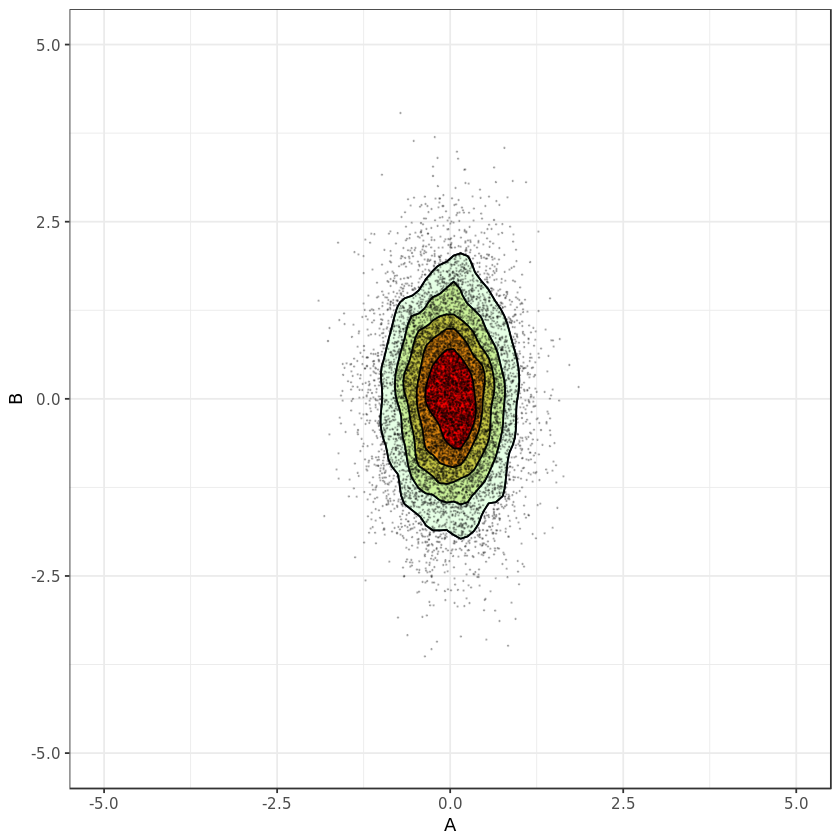

In [48]:
N<-10000
A<-rnorm(N,mean=0,sd=0.5)
B<-rnorm(N,mean=0,sd=1)
df<-data.frame(A,B)

print(paste("Matriz de covarianza:"))
cov(df)

library(ggplot2)
ggplot(df, aes(x=A, y=B))+geom_density2d(aes(colour=..level..)) + 
  stat_density2d(aes(fill=..level..,alpha=..level..),geom='polygon',colour='black') + 
  scale_fill_continuous(low="green",high="red") +    
  geom_point(alpha=0.2,size=0.1)+
  theme_bw()+theme(legend.position="none")+xlim(c(-5,5))+ylim(c(-5,5))

Como son independientes, la probabilidad condicional de B respecto a A es igual a la probabilidad de B

P(B|A)=P(B)

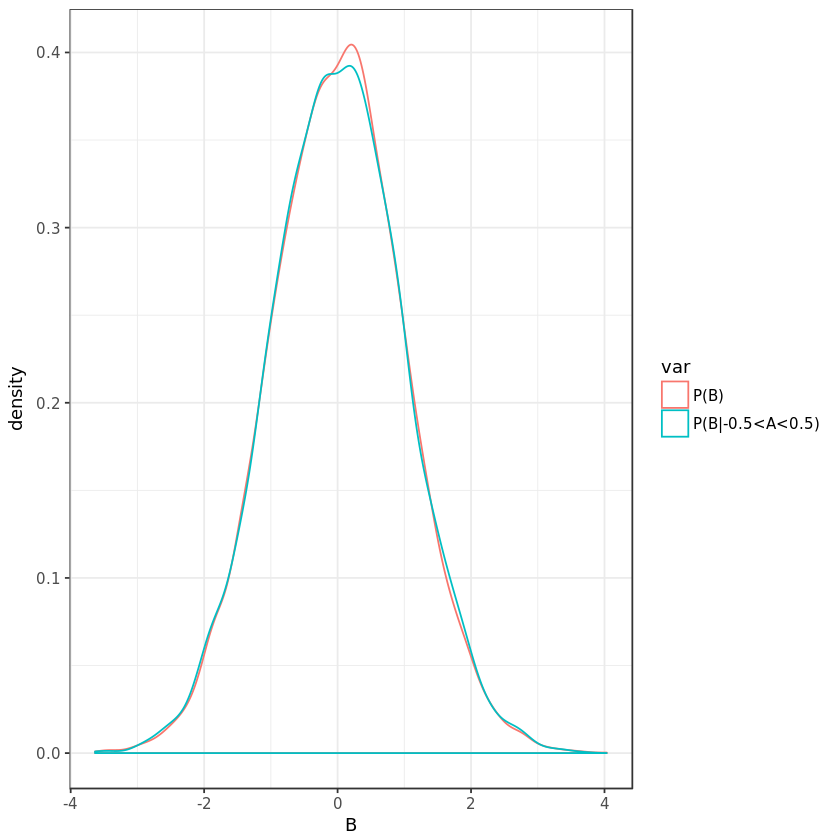

In [49]:
dfPartialProbs<-data.frame(B=B,var="P(B)")
dfPartialProbs<-rbind(dfPartialProbs,data.frame(B=df$B[df$A>-0.5 & df$A<0.5],var="P(B|-0.5<A<0.5)"))


ggplot(dfPartialProbs, aes(x=B,color=var))+geom_density()+
  theme_bw()

### Dos variables dependientes

En este caso: 
P(B,A)=P(B|A)·P(A)=P(A,B)=P(A|B)·P(B)

En este caso la matriz de covarianza no es diagonal.

[1] "Matriz de covarianza:"


,A,B
A,3.909992,3.879578
B,3.879578,7.744887


Warning message:
“Removed 5 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 5 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 5 rows containing missing values (geom_point).”

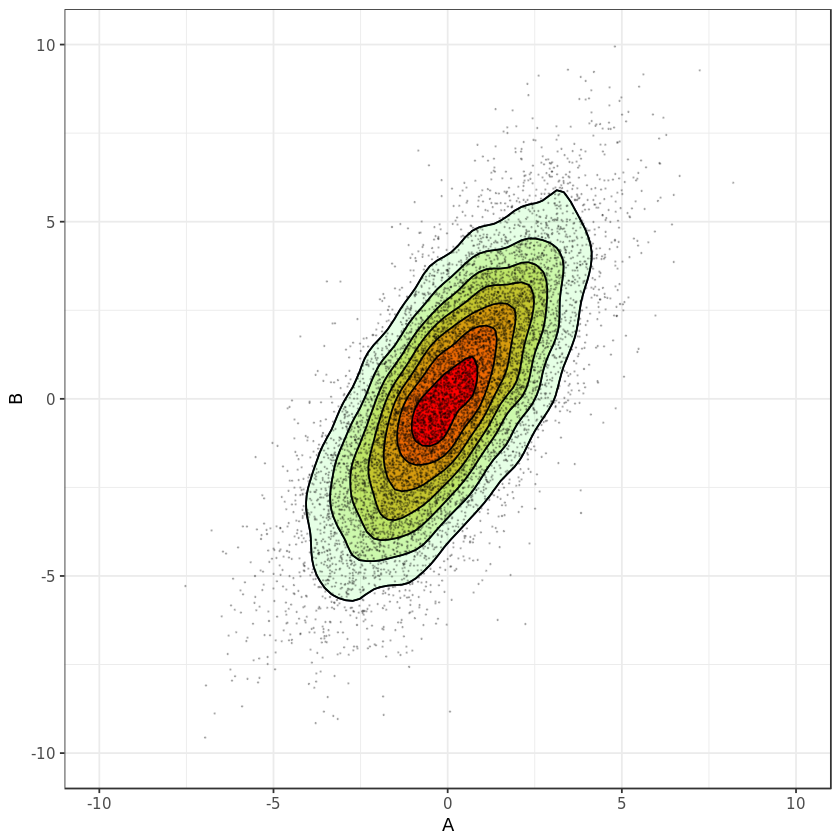

In [50]:
N<-10000
A<-rnorm(N,mean=0,sd=2)
B<-A+rnorm(N,mean=0,sd=2)
df<-data.frame(A,B)

print(paste("Matriz de covarianza:"))
cov(df)

library(ggplot2)
ggplot(df, aes(x=A, y=B))+geom_density2d(aes(colour=..level..)) + 
  stat_density2d(aes(fill=..level..,alpha=..level..),geom='polygon',colour='black') + 
  scale_fill_continuous(low="green",high="red") +    
  geom_point(alpha=0.2,size=0.1)+
  theme_bw()+theme(legend.position="none")+xlim(c(-10,10))+ylim(c(-10,10))

Como son dependientes, la probabilidad condicional de B respecto a A es diferente a la probabilidad de B
\\[
P(B|A) \neq P(B)
\\]

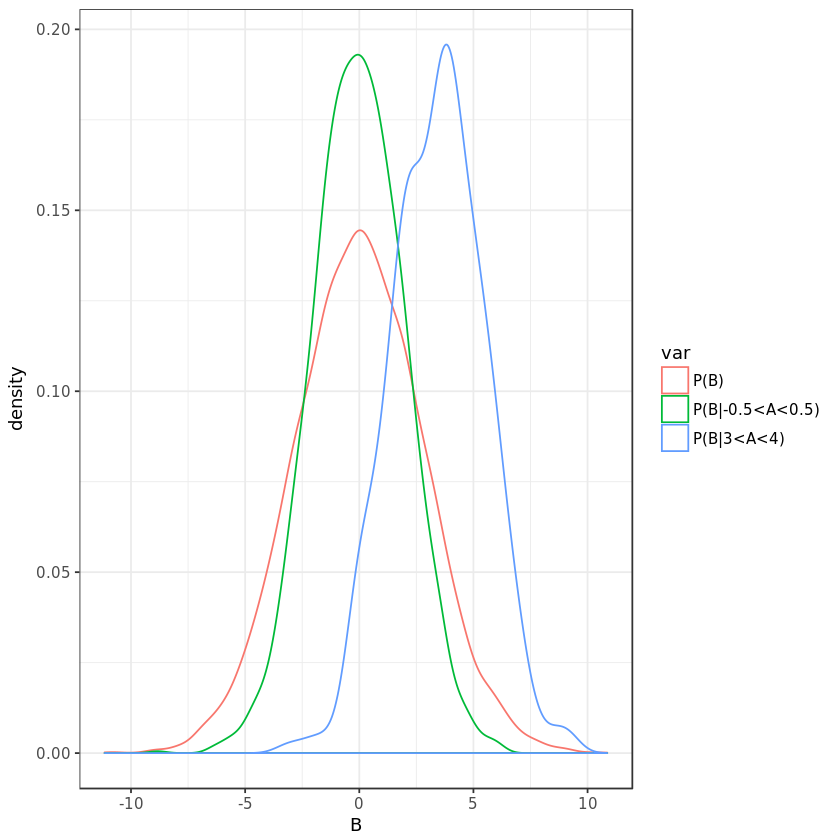

In [51]:
dfPartialProbs<-data.frame(B=B,var="P(B)")
dfPartialProbs<-rbind(dfPartialProbs,data.frame(B=df$B[df$A>-0.5 & df$A<0.5],var="P(B|-0.5<A<0.5)"))

dfPartialProbs<-rbind(dfPartialProbs,data.frame(B=df$B[df$A>3 & df$A<4],var="P(B|3<A<4)"))


ggplot(dfPartialProbs, aes(x=B,color=var))+geom_density()+
  theme_bw()

# Teorema de Bayes


El teorema de Bayes describe la probabilidad de un evento basado en conocimientos previos que puede estar relacionado con el evento. Su fórmula es bastente simple:
\\[
P(A|B)=\frac{P(B|A)·P(A)}{P(B)}=\frac{P(B,A)}{P(B)}
\\]
donde A y B son nuestras variables aleatorias y $P(B) \neq 0$:
* P(A|B) es la probabilidad condicional del evento A, sabiendo que ha ocurrido B
* P(B|A) es la probabilidad condicional del evento B, sabiendo que ha ocurrido A
* P(A) y P(B) es la probabilidad de observar A y B de forma independiente. Es conocido como la probabilidad **marginal**.
* P(B,A) o  P(B $\cap$ A): es la probabilidad de que ambos eventos A y B ocurran a la vez. 
 * Si son sucesos independientes P(B,A)=P(B)·P(A)
 * Si son sucesos dependientes P(B,A)=P(B|A)·P(A)


![]( ./relaciones2variables/bayes1.jpg )

En la imagen anterior podemos ver dentro del cuadrado verde disparos rojos y blancos sobre un barco.
En total hay 35 disparos, 20 rojos y 15 blancos.

La probabilidad de elegir un disparo rojo al azar es:
\\[
\begin{split}
P(rojo)&=\frac{20}{35}=\frac{4}{7} \approx  0.571 \\
P(blanco)&=\frac{15}{35}=\frac{3}{7} \approx  0.428
\end{split}
\\]

La probabilidad de, en ese cuadrado, acertar al barco es:
\\[
P(barco)=\frac{4}{35} \approx  0.114
\\]

Si sabemos que se ha realizado un disparo **blanco**, ¿cuál es la probabilidad de que haya dado al **barco**?
\\[
P(barco|blanco)=\frac{3}{15} = 0.3
\\]

Si sabemos que se ha realizado un disparo **rojo**, ¿cuál es la probabilidad de que haya dado al **barco**?
\\[
P(barco|rojo)=\frac{1}{20} = 0.05
\\]

#### Apliquemos Bayes

El **barco** ha sido alcanzado por un disparo ¿Cuál es la probabilidad de que ese disparo sea **rojo**? 

Nos están preguntando por $P(rojo|barco)$. Conocemos P(barco|rojo), P(barco) y P(rojo), así que por el teorema de Bayes:

\\[
P(rojo|barco)=\frac{P(barco|rojo)·P(rojo)}{P(barco)} =\frac{0.05 ·\frac{20}{35} }{\frac{4}{35}}=\frac{1}{4}=0.25
\\]



El **barco** ha sido alcanzado por un disparo ¿Cuál es la probabilidad de que ese disparo sea **blaco**? 

Nos están preguntando por $P(blanco|barco)$. Conocemos P(barco|blanco), P(barco) y P(blanco), así que por el teorema de Bayes:

\\[
P(rojo|barco)=\frac{P(barco|blanco)·P(blanco)}{P(barco)} =\frac{\frac{3}{15} ·\frac{15}{35} }{\frac{4}{35}}=\frac{3}{4}=0.75
\\]


#### Probabilidad conjunta

¿Cual es la probabilidad de que un disparo de al **barco** y además sea **rojo**?

\\[
\begin{split}
P(barco,rojo)&=P(barco|rojo)·P(rojo)=\frac{1}{20}·\frac{20}{35}=\frac{1}{35} \\
P(barco,rojo)&=P(rojo|barco)·P(barco)=\frac{1}{4}·\frac{4}{35}=\frac{1}{35}
\end{split}
\\]


## Arboles bayesianos

Estamos en el año 2025, un terrible virus ha escapado de un laboratorio de máxima seguridad y está infectando a gente alrededor de todo el mundo convirtiendolos en zombies admiradores de [Nyan Cat](https://www.youtube.com/watch?v=QH2-TGUlwu4) aunque luego en apariencia llevan una vida normal. Se calcula que en este momento un **5% de la población** mundial está infectada.

Afortunadamente existe un test al que se puede someter a un individuo para ver si está infectado o no. Pero el test no es 100% fiable, nunca se tiene tanta seguridad. Si la persona está infectada el test acertará un 99% de las veces, en cambio si no está infectada el test acertará un 98% de las veces. Esto genera la siguiente **matriz de confusión**:

| |Infectado|Sano|
|-|-|-|
|**Test=1**| 99%| 2% |
|**Test=0**| 1%| 98% |


Si elegimos una persona al azar y nuestro test dice que está infectado, ¿que posibilidades hay de que realmente esté infectado?
Queremos saber P(Zombie=1|Test=1)

Utilizando Bayes:
\\[
P(Zombie=1|Test=1)=\frac{P(Test=1|Zombie=1)·P(Zombie=1)}{P(Test=1)}
\\]
Pero desconocemos $P(Test=1)$, aunque podemos obtenerlo mediante:
\\[
\begin{split}
P(Test=1)&=P(Test=1|Zombie=1)·P(Zombie=1)+P(Test=1|Zombie=0)·P(Zombie=0) \\
P(Test=1)&=P(Test=1,Zombie=1)+P(Test=1,Zombie=0)
\end{split}
\\]
Es decir:
\\[
\begin{split}
P(Z=1|T=1)=\frac{P(T=1|Z=1)·P(Z=1)}{P(T=1|Z=1)·P(Z=1)+P(T=1|Z=0)·P(Z=0)} \\
P(Z=1|T=1)=\frac{0.99·0.05}{0.99·0.05+0.02·0.95}=0.7226 \\
\end{split}
\\]


Esta misma información se puede representar con un grafo acíclico:

![]( relaciones2variables/bayestree1.png )

## El problema de Monty Hall

Este problema recibe su nombre tras el programa de televisión "Let's Make a Deal" presentado por Monty Hall en la década de 1970. El enunciado más famoso del problema, extraído de Parade Magazine en 1990:

*Supón que estás en un concurso, y se te ofrece escoger entre tres puertas: detrás de una de ellas hay un coche, y detrás de las otras, cabras. Escoges una puerta, digamos la nº1, y el presentador, que sabe lo que hay detrás de las puertas, abre otra, digamos la nº3, que contiene una cabra. Entonces te pregunta: "¿No prefieres escoger la nº2?". ¿Es mejor para ti cambiar tu elección?*


![]( relaciones2variables/montyhall.png )


Tenemos tres hipótesis:
* $H_1$: El coche está tras la puerta 1
* $H_2$: El coche está tras la puerta 2
* $H_3$: El coche está tras la puerta 3

Evidentemente, como no tenemos ningún tipo de información adicional:
\\[
P(H_1)=P(H_2)=P(H_3)=\frac{1}{3}
\\]

Nuestra evidencia vendrá de Monty abriendo una puerta, evidentemente sabemos que:
* Monty siempre abrirá una puerta de las 2 que no hayamos seleccionado.
* Monty nunca abrirá la puerta que tenga el coche.


Nosotros estamos interesados en la probabilidad que el coche esté detrás de una puerta utilizando nuestro conocimiento.

Imaginemos que el **concursante selecciona la puerta 1**, a continuación **Monty selecciona la puerta 3**. Las siguientes **probabilidades condicionales** ocurren:
* Condición, el coche está tras la puerta 1: Puede abrir igualmente la puerta 2 o 3
\\[
P(M_3|H_1)=\frac{1}{2}=P(M_2|H_1)
\\]
* Condición, el coche está tras la puerta 2: Puede abrir solo la puerta 3:
\\[
P(M_3|H_2)=1
\\]
* Condición, el coche está tras la puerta 3: No podría abrir esa puerta:
\\[
P(M_3|H_3)=0
\\]

Desde nuestro punto de vista, la probabilidad marginal de que Monty elija la puerta 2 o 3 es la misma, porque no sabemos donde está el coche. Solo sabemos que nunca eligirá la puerta 1 porque es la que seleccionó el concursante:
\\[
P(M_2)=P(M_3)=\frac{1}{2}
\\]


Ahora hay dos opciones, cambiar a la puerta 2 o mantenerse en la puerta 1.
* Se mantiene en puerta 1, sabiendo que la puerta 3 no tiene premio:
\\[
P(H_1|M_3)=\frac{P(M_3|H_1)·P(H_1)}{P(M_3)}=\frac{\frac{1}{2}·\frac{1}{3}}{\frac{1}{2}}=\frac{1}{3}
\\]
* Se cambia a la puerta 2, sabiendo que la puerta 3 no tiene premio:
\\[
P(H_2|M_3)=\frac{P(M_3|H_2)·P(H_2)}{P(M_3)}=\frac{1·\frac{1}{3}}{\frac{1}{2}}=\frac{2}{3}
\\]

Así pues se ve que la probabilidad de cambiar de puerta es 2/3, mientras que la probabilidad de mantenerse con la original es 1/3.


In [52]:
N<-10000
puerta_con_premio<-floor(runif(N,min=1,max=4))

seleccion_inicial_del_concursante<-floor(runif(N,min=1,max=4))
seleccion_cambiada_del_concursante<-rep(NA,N)

for (i in 1:N){
    
    # Monty selecciona una puerta
    if (puerta_con_premio[i]==1){
        if (puerta_con_premio[i]==seleccion_inicial_del_concursante[i]){
            seleccion_monty<-ifelse(runif(1)>0.5,2,3)
        }else{
            seleccion_monty<-ifelse(seleccion_inicial_del_concursante[i]==3,2,3)
        }
    }else if (puerta_con_premio[i]==2){
        if (puerta_con_premio[i]==seleccion_inicial_del_concursante[i]){
            seleccion_monty<-ifelse(runif(1)>0.5,1,3)
        }else{
            seleccion_monty<-ifelse(seleccion_inicial_del_concursante[i]==3,1,3)
        }        
    }else if (puerta_con_premio[i]==3){
        if (puerta_con_premio[i]==seleccion_inicial_del_concursante[i]){
            seleccion_monty<-ifelse(runif(1)>0.5,1,2)
        }else{
            seleccion_monty<-ifelse(seleccion_inicial_del_concursante[i]==1,2,1)
        }
    }
    
    # El concursante selecciona otra puerta
    puertas_prohibidas<-c(seleccion_monty,seleccion_inicial_del_concursante[i])
    seleccion_cambiada_del_concursante[i]<-which(is.na(match(1:3,puertas_prohibidas)))    
}

p1<-mean(seleccion_inicial_del_concursante==puerta_con_premio)
print(paste0("Si el concursante nunca cambia de puerta la probabilidad de acertar es:",p1))
p2<-mean(seleccion_cambiada_del_concursante==puerta_con_premio)
print(paste0("Si el concursante siempre cambia de puerta la probabilidad de acertar es:",p2))

[1] "Si el concursante nunca cambia de puerta la probabilidad de acertar es:0.3363"
[1] "Si el concursante siempre cambia de puerta la probabilidad de acertar es:0.6637"
